In [2]:
import pandas as pd               # Pandas handles dataframes
import numpy as np                # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns
import datetime
from lib.utils import sql_from_cache, year, sem



In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [84]:
disc = pd.read_csv('data/processed/disc.csv')
mc = pd.read_csv('data/nonpublic/mc.csv')
# houve um erro no cálculo do Nunique
s = mc['Nunique']
mc['Nunique'] = s.where(s != 0,1)
# pandas reclama: DtypeWarning: Columns (53) have mixed types. Paciência https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.errors.DtypeWarning.html
mc_filtered = mc[~((mc['N'] ==1) & (mc['forum'] ==1))]
# Só um fórum,  deve ser o de Avisos. TODO: talvez o Fórum Avisos está sendo usado...

/opt/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [85]:
pd.set_option('display.max_columns',None)
mc.query("Nunique == 1")[:3]

,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse
3,99,https://edisciplinas.usp.br/course/view.php?id=99,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,-0.0,1,1,0,0,1,0,0,0,Elementos de Lógica para Documentação,CBD0260 - 2012,"CBD0260.2.2015105, CBD0260.1.2015101",CBD,ECA,2012,1,0,2,0,0,49,0,0,2,humanas,GR,CBD0260,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,1103,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,-0.0,1,1,0,0,1,0,0,0,Música Brasileira II,5970323,5970323.2.2012201,597,FFCLRP,2012,2,0,1,0,0,21,0,0,1,exatas,GR,5970323,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,50,https://edisciplinas.usp.br/course/view.php?id=50,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,-0.0,1,1,0,0,1,0,0,0,Laboratório de Comunicações: Ante-projeto de F...,PTC2527,PTC2527.2.2012150,PTC,EP,2012,1,0,1,0,0,5,0,0,1,exatas,GR,PTC2527,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Modulos
O que podemos aprender sobre a maneira que o sistema é usado com o número de recursos e atividades que os docentes coloquem lá? Há alguma evolução com os anos? Há diferenças com a área? 

Primeiro, vamos ver a fração de ambientes com 1 fórum e além disso só arquivos. Isso deve ser uma medida razoavelmente confiável da fração de ambientes usados somente como repositório de arquivos. 

In [86]:
def analyze_mc(mc,ano=None,unidade=None,filtered=False):
    df = mc
    df['repo'] = (df['forum'] == 1) & (df['resource'] > 0) & (df['Nunique'] == 2)
    
    if filtered:
        df = df[(df['N'] != 1)]
    
    if ano:
        df = df.query("ano == @ano")
    if unidade:
        df = df.query("unidade == @unidade")
    return df
analyze_mc(mc,2020,'FD',True).sort_values('index',ascending=False)[:5]

,index,link,assign,attendance,bigbluebuttonbn,book,chat,choice,data,dialogue,folder,forum,glossary,imscp,label,lesson,lti,oublog,ouwiki,page,questionnaire,quiz,recordingsbn,resource,scorm,survey,url,wiki,workshop,sdi,Nunique,N,Nresource1,Nresource2,Ncommunication,Nfeedback,Nassess,Nadmin,fullname,shortname,idnumber,catname,unidade,ano,sem,advancedteacher,editingteacher,manager,monitor,student,studentcopy,teacher,nturmas,area,posgrad,coddis,semestre,activequiz,assignment,hvp,simplecertificate,videogallery,choicegroup,scheduler,vpl,offlinequiz,obs,journal,poster,feedback,checklist,pdfannotator,publication,studentquiz,game,quizgame,subcourse,repo
34367,83782,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,DPC0520 - Novas Tendências do Direito Processu...,DPC0520-2NO-2020,DPC0520.1.20202NO,DPC,FD,2020,2,0,1,0,0,97,0,0,1,humanas,GR,DPC0520,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
34366,83708,https://edisciplinas.usp.br/course/view.php?id...,1,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0.693147,2,2,0,0,1,0,1,0,DPC0216 - Direito Processual Civil I - Procedi...,DPC0216-221-2020,"DPC0216.1.2020222,DPC0216.1.2020221",DPC,FD,2020,2,0,1,0,0,126,0,0,2,humanas,GR,DPC0216,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
35685,83242,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,14,1,0,0.0,11,0,0.0,0,0,0,0,0,0.0,1,0.0,0,0,0,0,0.950516,4,27,26,0,1,0,0,0,DEF0334 - Tributação da Economia Digital (2020),DEF0334-2NO-2020,DEF0334.1.20202NO,DEF,FD,2020,2,0,1,0,0,140,0,0,1,humanas,GR,DEF0334,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
33711,83075,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,9,0.0,0,0,0,0,0.325083,2,10,9,0,1,0,0,0,DCV0126 - Teoria Geral do Direito Privado II (...,DCV0126-2020,"DCV0126.1.2020212,DCV0126.1.2020211",DCV,FD,2020,2,0,1,0,0,117,0,0,2,humanas,GR,DCV0126,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
33428,82929,https://edisciplinas.usp.br/course/view.php?id...,0,0,0,0,0,0,0,0,0,1,0,0.0,0,0,0.0,0,0,0,0,0,0.0,11,0.0,0,5,0,0,0.808270,3,17,16,0,1,0,0,0,DES5803 - O Partido Político na Contemporaneid...,DES5803--2020,DES5803.3.2,DES,FD,2020,2,0,1,0,0,20,0,0,1,humanas,POS,DES5803,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


IF: ambientes total: 978, ambientes só arquivos: 162 (0.17)
IFSC: ambientes total: 470, ambientes só arquivos: 43 (0.09)
FEA: ambientes total: 2563, ambientes só arquivos: 729 (0.28)


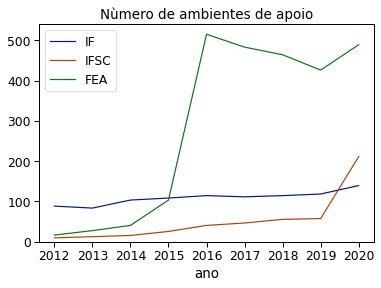

In [87]:
unidades = ['IF','IFSC','FEA']

for unidade in unidades:
    df = analyze_mc(mc,unidade=unidade,filtered=False)
    N = len(df)
    Nr = df.repo.sum()
    print("{}: ambientes total: {}, ambientes só arquivos: {} ({:0.2f})".format(unidade,N,Nr,Nr/N))
    ax = df.groupby('ano')['N'].count().plot(kind='line',label=unidade)
    
ax.set_ylim(0)
ax.legend()
ax.set_title("Nùmero de ambientes de apoio");

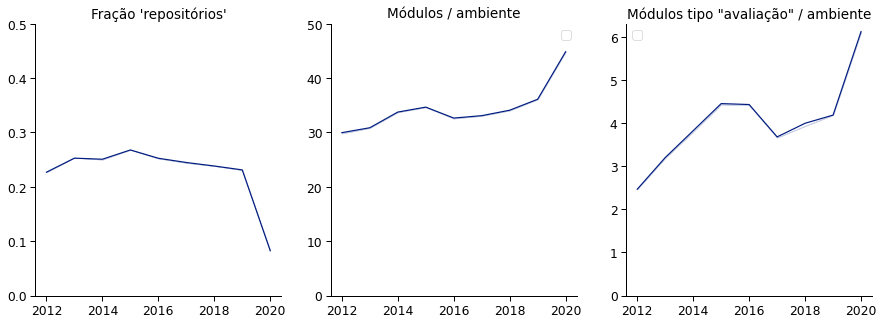

In [113]:
#unidades = 'FEA'
unidade = None
data = analyze_mc(mc,unidade=None,filtered=True)
data_unidade = analyze_mc(mc,unidade=unidade,filtered=True)

sns.set_context('paper',font_scale=1.4)
sns.set_palette('dark',n_colors=3)
fig,axs =  plt.subplots(1,3,sharex=False)
fig.set_figwidth(15);fig.set_figheight(5)
ax = axs[0]

sns.lineplot(data=data,x='ano',y='repo',ci=False,ax=ax)
if unidade:
    c = 'red'
    sns.lineplot(data=data_unidade,x='ano',y='repo',ci=False,ax=ax,color=c,linewidth=2,label=unidade)

plt.plot()
ax.set_ylim(0,0.5)
ax.set_title("Fração 'repositórios'")
ax.set_ylabel('')
ax.set_xlabel('')
#ax.legend(["Humanas",'Exatas','Biológicas'])
if unidade:
    ax.legend(["USP",unidade])


ax = axs[1]
sns.lineplot(data=data,x='ano',y='N',ci=False,ax=ax)
if unidade:
    sns.lineplot(data=data_unidade,x='ano',y='N',ci=False,ax=ax,color='red',linewidth=2)

ax.set_ylim(0,50)
ax.set_title("Módulos / ambiente")
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend("")

ax = axs[2]
sns.lineplot(data=data,x='ano',y='Nassess',ci=False,ax=ax)
if unidade:
    sns.lineplot(data=data_unidade,x='ano',y='Nassess',ci=False,ax=ax,color='red',linewidth=2,label=unidade)

ax.set_ylim(0)
ax.set_title('Módulos tipo "avaliação" / ambiente')
ax.set_ylabel('')
ax.set_xlabel('')
ax.legend("")

sns.despine()
fig.suptitle("");
fig.savefig('figs/modulos-1.png',bbox_inches='tight',dpi=300)

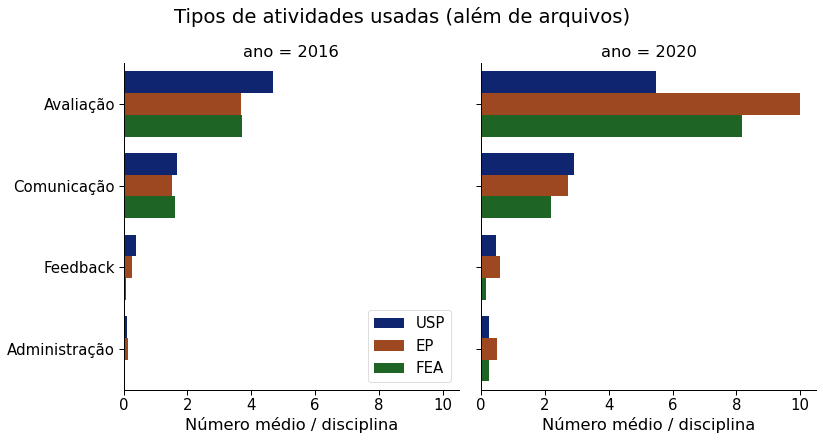

In [132]:
def uc(unidade,unidades):
    if unidade in unidades:
        return unidade
    else:
        return 'USP'

unidades = ['EP','FEA']
sns.set_context('paper',font_scale=1.7)
data = mc_filtered.copy()
data['uc'] = data['unidade'].apply(uc,unidades=unidades)

cols = ['ano','uc','Nfeedback', 'Nassess', 'Nadmin', 'Ncommunication']

data = data[cols]
data = data[data['ano'].isin([2016,2020])]
data = pd.melt(data,id_vars=['ano','uc'])
g = sns.catplot(data=data,kind='bar',y='variable',x='value',estimator=np.mean,
                order=['Nassess','Ncommunication','Nfeedback','Nadmin'],hue='uc',
                ci=None,col='ano',height=6,legend=False)
g.set_ylabels("")
g.set_xlabels("Número médio / disciplina")
g.set_yticklabels(['Avaliação','Comunicação','Feedback',"Administração"])
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Tipos de atividades usadas (além de arquivos)")
g.axes[0,0].legend(loc='lower right');

In [6]:
sns.set_context('paper',font_scale=1.3)
p = sns.color_palette('bright',3)
p

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549)]

<AxesSubplot:xlabel='Nunique', ylabel='Count'>

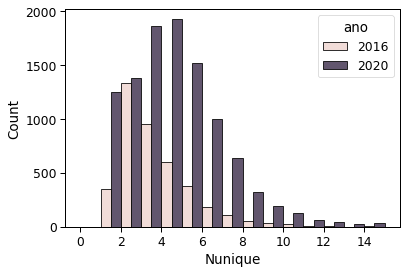

In [88]:
fig = plt.figure(figsize = (8,6))
data = mc[mc['Nunique'] > 0]
data = data[data['ano'].isin(['2016','2020'])]
sns.histplot(data=data, x='Nunique',kde=False,bins=range(0,16),hue='ano',multiple='dodge')

In [102]:
sns.set_context('paper',font_scale=1.3)
p = sns.color_palette('bright',2)
p

[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0)]

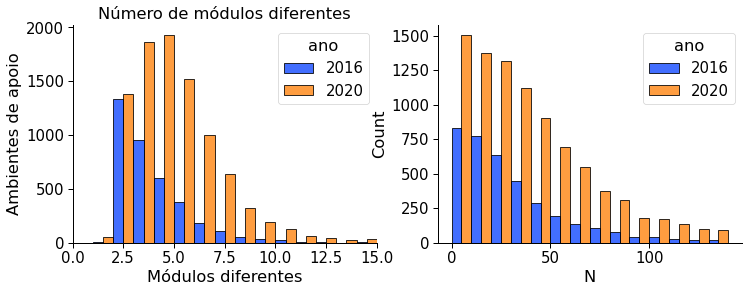

In [151]:
anos = ['2016','2020']
fig,axs =  plt.subplots(1,2,sharex=False)
fig.set_figwidth(12);fig.set_figheight(4)
stat = 'count'


bins = range(0,18)
ax = axs[0]
data=mc_filtered
data = data[data['ano'].isin(anos)]
sns.histplot(data=data, x='Nunique',kde=False,bins=range(0,16),hue='ano',multiple='dodge',stat=stat,palette=p,ax=ax)
ax.set_title("Número de módulos diferentes")
ax.set_ylabel('')
ax.set_xlabel("Módulos diferentes")
ax.set_xlim(0,15)
ax.set_ylabel('Ambientes de apoio')

ax = axs[1]
bins = range(0,150,10)
data=mc_filtered
data = data[data['ano'].isin(anos)]
sns.histplot(data=data, x='N',kde=False,bins=bins,hue='ano',multiple='dodge',stat=stat,palette=p,ax=ax)
#ax.set_xlim(0,15)
#ax.legend(anos)
#ax.set_title("Número de módulos")
#ax.set_xlabel("Módulos")


sns.despine()
#fig.suptitle("Moodle da USP: distribuição de medidas de complexidade")

In [146]:
mc_filtered.groupby('ano')[['Nunique','N']].mean()


,Nunique,N
ano,,
2012,3.467136,29.920188
2013,3.767668,30.858657
2014,3.583470,33.744937
2015,3.583578,34.651864
2016,3.459290,32.640984
2017,3.483159,33.081930
2018,3.579176,34.084796
2019,3.654118,36.100328
2020,4.557527,44.843910


(2012.0, 2020.0)

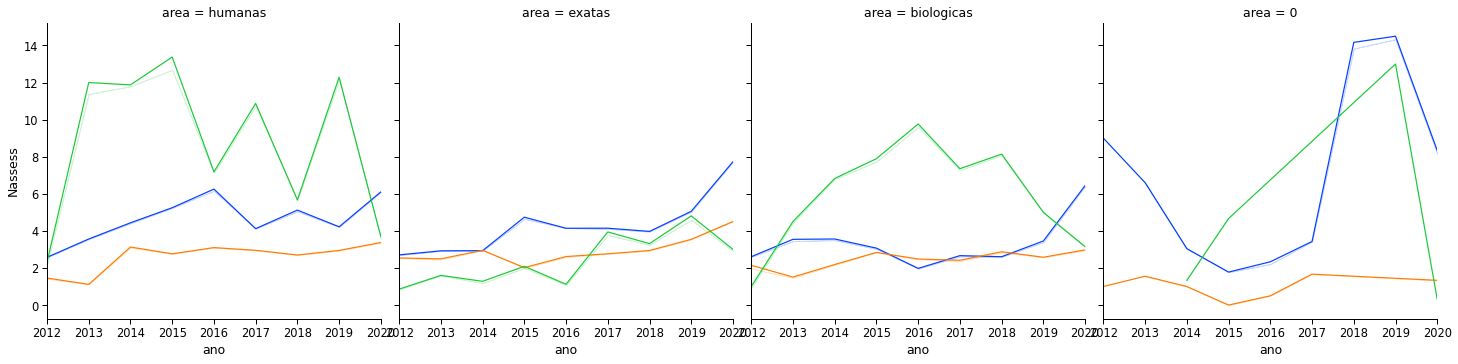

In [45]:
g = sns.relplot(data=mc_filtered,x='ano',y='Nassess',kind='line',estimator=np.mean,ci=False,hue='posgrad',col='area',legend=False)
ax=plt.gca()
ax.set_xlim(2012,2020)

resource    602052.0
assign       84625.0
forum        48263.0
dtype: float64


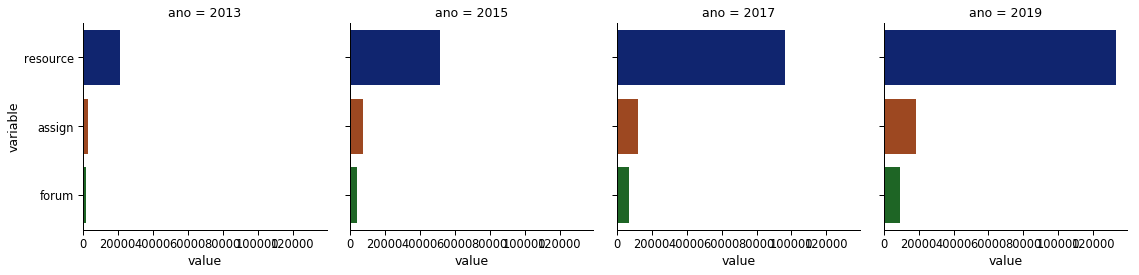

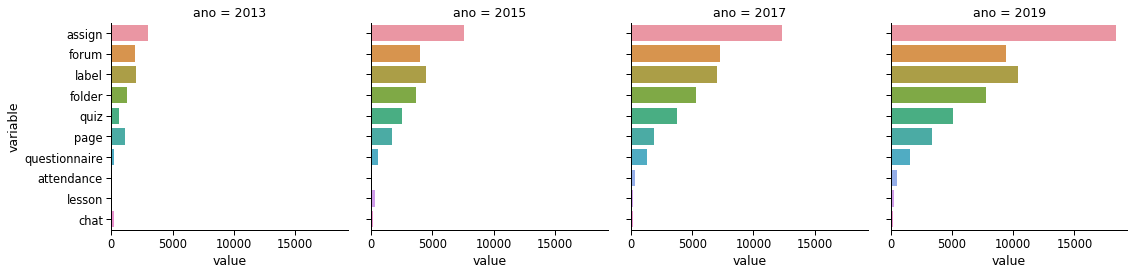

In [21]:
cols = ['ano','area','activequiz','assign', 'assignment', 
        'attendance', 'bigbluebuttonbn', 'book','chat', 'choice',
        'choicegroup', 'dialogue','feedback', 'folder', 'forum',
        'glossary', 'hvp','imscp','label', 'lesson',
        'lti', 'oublog', 'ouwiki', 'page', 'poster', 'questionnaire', 'quiz',
        'recordingsbn', 'resource', 'scheduler', 'scorm',
        'simplecertificate', 'survey','videogallery','vpl', 'wiki', 'workshop']
N=3
anos = [2013,2015,2017,2019]
data = mc_filtered[cols]
data = data[data['ano'].isin(anos)]
data = pd.melt(data,id_vars=['ano','area'])
order = mc_filtered[cols].drop(columns='ano') .sum().sort_values(ascending=False)[:N]
print(order)
order = order.index
g = sns.catplot(data=data,kind='bar',y='variable',x='value',estimator=np.sum,order=order,
            ci=None,col='ano',height=4)
N=10
data = mc_filtered[cols].drop(columns='resource')
data = data[data['ano'].isin(anos)]
data = pd.melt(data,id_vars=['ano','area'])
order = mc_filtered[cols].drop(columns=['ano','resource']).sum().sort_values(ascending=False).index[:N]
g = sns.catplot(data=data,kind='bar',y='variable',x='value',estimator=np.sum,order=order,
            ci=None,col='ano',height=4)